# 1. Import

In [28]:
# 연산 처리를 위한 패키지
import numpy as np
import pandas as pd
from pandas import DataFrame
from math import sqrt

# 데이터 분석을 위한 패키지
import statsmodels.api as sm

# 시각화를 위한 패키지
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# 필요모듈 import
import os
import openpyxl
from datetime import datetime
from tqdm import tqdm

# 그래프를 실제로 그리기 위한 설정
%matplotlib inline

# 머신러닝 패키지
from catboost import CatBoostRegressor
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from lightgbm.sklearn import LGBMRegressor
import random
import optuna
from optuna.samplers import TPESampler
import lightgbm as lgb

from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
import re
import optuna
from optuna.integration import XGBoostPruningCallback
sns.set_theme(style="darkgrid")


# KFold(CV), partial : optuna를 사용하기 위함
from sklearn.model_selection import KFold
from functools import partial

# 폰트 처리
# plt.rc('font', family='NanumGothic')        # for windows
plt.rc('font', family='AppleGothic') # For MacOS

import warnings
warnings.filterwarnings('ignore')

# 2.1. 데이터 로딩

In [2]:
# 뉴 데이터 로딩
test = pd.read_csv('data/final_test.csv', index_col = 0)             # unnamed_0 이라는 index가 추가되어 나오지 않게 'index_col = 0' 을 추가했습니다.
train = pd.read_csv('data/final_train.csv', index_col = 0)

submission = pd.read_csv('data/sample_submission.csv')

train2 = train.copy()
train.head()

,index,송하인_격자공간고유번호,송하인_격자공간명,송하인_시도코드,송하인_시도명,송하인_시군구코드,송하인_시군구명,수하인_격자공간고유번호,수하인_격자공간명,수하인_시도코드,수하인_시도명,수하인_시군구코드,수하인_시군구명,물품_카테고리,운송장_건수
0,0,5011000595017300,다나1395,50,제주특별자치도,50110,제주시,2871000192069300,다사1072,28,인천광역시,28710,강화군,음반,3
1,1,4148000690043300,다사2868,41,경기도,41480,파주시,5011000264024400,다다0901,50,제주특별자치도,50110,제주시,문화컨텐츠,3
2,2,5011000078068400,다다3007,50,제주특별자치도,50110,제주시,1120000007005400,다사5950,11,서울특별시,11200,성동구,농산물,3
3,3,4127100048006400,다사4521,41,경기도,41271,안산시상록구,5011000587019400,다나0595,50,제주특별자치도,50110,제주시,기타식품,7
4,4,5011000078068400,다다3007,50,제주특별자치도,50110,제주시,2823700010076300,다사3145,28,인천광역시,28237,부평구,농산물,3


In [3]:
def setting_data(train, test, one, two, three, four, five, six):
  test['송하인_격자공간고유번호'] = test['송하인_격자공간고유번호'].astype(str)
  test['수하인_격자공간고유번호'] = test['수하인_격자공간고유번호'].astype(str)
  train['송하인_격자공간고유번호'] = train['송하인_격자공간고유번호'].astype(str)
  train['수하인_격자공간고유번호'] = train['수하인_격자공간고유번호'].astype(str)

  train['송하인_코드1'] = train['송하인_격자공간고유번호'].str.slice(int(one),int(two))
  train['송하인_코드2'] = train['송하인_격자공간고유번호'].str.slice(int(two),int(three))
  train['송하인_코드3'] = train['송하인_격자공간고유번호'].str.slice(int(three),int(four))
  train['송하인_코드4'] = train['송하인_격자공간고유번호'].str.slice(int(four),int(five))
  train['송하인_코드5'] = train['송하인_격자공간고유번호'].str.slice(int(five),int(six))

  train['수하인_코드1'] = train['수하인_격자공간고유번호'].str.slice(int(one),int(two))
  train['수하인_코드2'] = train['수하인_격자공간고유번호'].str.slice(int(two),int(three))
  train['수하인_코드3'] = train['수하인_격자공간고유번호'].str.slice(int(three),int(four))
  train['수하인_코드4'] = train['수하인_격자공간고유번호'].str.slice(int(four),int(five))
  train['수하인_코드5'] = train['수하인_격자공간고유번호'].str.slice(int(five),int(six))

  test['송하인_코드1'] = test['송하인_격자공간고유번호'].str.slice(int(one),int(two))
  test['송하인_코드2'] = test['송하인_격자공간고유번호'].str.slice(int(two),int(three))
  test['송하인_코드3'] = test['송하인_격자공간고유번호'].str.slice(int(three),int(four))
  test['송하인_코드4'] = test['송하인_격자공간고유번호'].str.slice(int(four),int(five))
  test['송하인_코드5'] = test['송하인_격자공간고유번호'].str.slice(int(five),int(six))

  test['수하인_코드1'] = test['수하인_격자공간고유번호'].str.slice(int(one),int(two))
  test['수하인_코드2'] = test['수하인_격자공간고유번호'].str.slice(int(two),int(three))
  test['수하인_코드3'] = test['수하인_격자공간고유번호'].str.slice(int(three),int(four))
  test['수하인_코드4'] = test['수하인_격자공간고유번호'].str.slice(int(four),int(five))
  test['수하인_코드5'] = test['수하인_격자공간고유번호'].str.slice(int(five),int(six))

  train = train[['index', 
                  '송하인_코드1','송하인_시도명',
                  '송하인_코드2', '송하인_시군구명',
                  '송하인_코드3', '송하인_코드4', '송하인_코드5',
                  
                  '수하인_코드1', '수하인_시도명',
                  '수하인_코드2', '수하인_시군구명',
                  '수하인_코드3', '수하인_코드4', '수하인_코드5',
                  '물품_카테고리', 
                  '운송장_건수']]

  test = test[['index',
                '송하인_코드1','송하인_시도명',
                '송하인_코드2', '송하인_시군구명', 
                '송하인_코드3', '송하인_코드4', '송하인_코드5',

                '수하인_코드1', '수하인_시도명',
                '수하인_코드2', '수하인_시군구명',
                '수하인_코드3', '수하인_코드4', '수하인_코드5',
                '물품_카테고리',
                ]]
                
  return train, test


In [4]:
def confirm_nun(train):
  print('송하인 코드 1, 2, 3, 4, 5는 각각 ~ 종류의 코드가 존재합니다.')
  print('코드_1 :', train['송하인_코드1'].nunique())
  print('코드_2 :', train['송하인_코드2'].nunique())
  print('코드_3 :', train['송하인_코드3'].nunique())
  print('코드_4 :', train['송하인_코드4'].nunique())
  print('코드_5 :', train['송하인_코드5'].nunique())

  print("*"*50)

  print('수하인 코드 1, 2, 3, 4, 5는 각각 ~ 종류의 코드가 존재합니다.')
  print('코드_1 :', train['수하인_코드1'].nunique())
  print('코드_2 :', train['수하인_코드2'].nunique())
  print('코드_3 :', train['수하인_코드3'].nunique())
  print('코드_4 :', train['수하인_코드4'].nunique())
  print('코드_5 :', train['수하인_코드5'].nunique())

  print('*'*50)
  print('수하인_코드4의 고유값은')
  print(train['수하인_코드4'].unique())


In [5]:
train1, test1 = setting_data(train, test, '0', '2', '5', '8', '10', '16')       # 0, 2, 5, 9, 10, 16번째 위치에서 코드를 잘라서 저장합니다. 이걸로 결정
train2, test2 = setting_data(train, test, '0', '2', '5', '10', '11', '16')      # 0, 2, 5, 10, 11, 16번째 위치에서 코드를 잘라서 저장합니다.

### train3은 16자리중 15,16번째 숫자들을 쳐내는 과정입니다.
### 전부 00 이라는 값을 가지기 때문에 학습할 때 제거해도 상관없다고 생각합니다.

In [6]:
train1

,index,송하인_코드1,송하인_시도명,송하인_코드2,송하인_시군구명,송하인_코드3,송하인_코드4,송하인_코드5,수하인_코드1,수하인_시도명,수하인_코드2,수하인_시군구명,수하인_코드3,수하인_코드4,수하인_코드5,물품_카테고리,운송장_건수
0,0,50,제주특별자치도,110,제주시,005,95,017300,28,인천광역시,710,강화군,001,92,069300,음반,3
1,1,41,경기도,480,파주시,006,90,043300,50,제주특별자치도,110,제주시,002,64,024400,문화컨텐츠,3
2,2,50,제주특별자치도,110,제주시,000,78,068400,11,서울특별시,200,성동구,000,07,005400,농산물,3
3,3,41,경기도,271,안산시상록구,000,48,006400,50,제주특별자치도,110,제주시,005,87,019400,기타식품,7
4,4,50,제주특별자치도,110,제주시,000,78,068400,28,인천광역시,237,부평구,000,10,076300,농산물,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31679,31679,44,충청남도,710,금산군,002,90,087200,50,제주특별자치도,110,제주시,002,13,073200,스포츠잡화,3
31680,31680,11,서울특별시,290,성북구,000,14,045300,50,제주특별자치도,110,제주시,003,19,087100,스마트디바이스,4
31681,31681,11,서울특별시,290,성북구,000,14,045300,50,제주특별자치도,110,제주시,002,63,065200,스마트디바이스,6
31682,31682,41,경기도,273,안산시단원구,000,65,073100,50,제주특별자치도,110,제주시,002,64,061200,지갑,7


In [7]:
confirm_nun(train1)

송하인 코드 1, 2, 3, 4, 5는 각각 ~ 종류의 코드가 존재합니다.
코드_1 : 17
코드_2 : 99
코드_3 : 14
코드_4 : 100
코드_5 : 400
**************************************************
수하인 코드 1, 2, 3, 4, 5는 각각 ~ 종류의 코드가 존재합니다.
코드_1 : 17
코드_2 : 101
코드_3 : 18
코드_4 : 100
코드_5 : 400
**************************************************
수하인_코드4의 고유값은
['92' '64' '07' '87' '10' '14' '69' '17' '23' '26' '16' '20' '63' '02'
 '27' '21' '96' '09' '48' '31' '03' '18' '06' '39' '24' '55' '04' '33'
 '35' '72' '56' '79' '30' '12' '59' '99' '41' '15' '62' '73' '32' '65'
 '70' '82' '74' '94' '46' '19' '78' '29' '52' '25' '85' '42' '13' '01'
 '08' '28' '05' '90' '53' '60' '66' '11' '77' '88' '00' '67' '98' '54'
 '44' '37' '36' '38' '81' '84' '58' '34' '68' '40' '57' '71' '83' '45'
 '49' '76' '47' '51' '43' '93' '61' '22' '86' '95' '50' '75' '97' '89'
 '91' '80']


In [8]:
print('*'*50)
print('수하인_코드2의 고유값은')
print(test1['수하인_코드2'].unique())

**************************************************
수하인_코드2의 고유값은
['110' '260' '130' '710' '480' '350' '465' '200' '210' '185' '173' '170'
 '570' '560' '440' '810' '470' '113' '237' '410' '390' '650' '590' '800'
 '500' '380' '900' '790' '360' '140' '430' '320' '680' '463' '111' '545'
 '770' '290' '780' '610' '150' '190' '285' '820' '330' '305' '230' '530'
 '135' '197' '310' '287' '270' '370' '131' '281' '450' '133' '750' '280'
 '740' '117' '180' '880' '220' '620' '199' '125' '830' '245' '250' '760'
 '129' '273' '155' '121' '115' '271' '850' '840' '550' '215' '195' '127'
 '123' '730' '461' '670' '630' '171' '870' '720' '890' '910' '240' '825'
 '860' '930' '745' '940' '920']


In [9]:
'''
종로구 : 110
중구 : 140
용산구 : 170
성동구 : 200
광진구 : 215
동대문구 : 230
중랑구 : 260
성북구 : 290
'''
train1[(train1['송하인_시군구명']=='강남구')&(train1['송하인_시도명']=='서울특별시')]

,index,송하인_코드1,송하인_시도명,송하인_코드2,송하인_시군구명,송하인_코드3,송하인_코드4,송하인_코드5,수하인_코드1,수하인_시도명,수하인_코드2,수하인_시군구명,수하인_코드3,수하인_코드4,수하인_코드5,물품_카테고리,운송장_건수
210,210,11,서울특별시,680,강남구,000,07,002200,50,제주특별자치도,110,제주시,003,73,011400,선글라스/안경테,3
213,213,11,서울특별시,680,강남구,000,15,064300,50,제주특별자치도,110,제주시,002,66,003200,기타화장품/미용,3
505,505,11,서울특별시,680,강남구,000,12,065400,50,제주특별자치도,110,제주시,003,19,002300,상의,3
750,750,11,서울특별시,680,강남구,000,10,070300,50,제주특별자치도,110,제주시,002,13,022200,상의,4
881,881,11,서울특별시,680,강남구,000,12,071300,50,제주특별자치도,130,서귀포시,006,22,057100,농산물,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30659,30659,11,서울특별시,680,강남구,000,16,020100,50,제주특별자치도,130,서귀포시,005,79,077400,기타패션의류,3
30806,30806,11,서울특별시,680,강남구,000,11,040100,50,제주특별자치도,110,제주시,002,66,031300,다이어트식품,5
31514,31514,11,서울특별시,680,강남구,000,32,011100,50,제주특별자치도,110,제주시,003,74,015300,기타패션의류,4
31599,31599,11,서울특별시,680,강남구,000,11,068300,50,제주특별자치도,110,제주시,002,66,060300,주얼리,4


In [10]:
# train1(5416), train2(5416)으로 나눠서 각자 고유값들을 확인해봤는데요,
# 5515의 경우 1부분이 [0,1]만 존재하는걸로 봐서, 맨 뒷자리 5와 이어진다고 생각했습니다
# 99999에서 100000 으로 넘어가기 때문에 이런식으로 나왔다고 생각했고,
# 우리나라 좌표에 고유번호를 50미터 단위로 지정을 했기 때문에, 정사각형 격자를 만들려면 제곱수가 나와야 한다고 생각했습니다.
# 때문에 6자리수 안에 들어갈 수 있는 데이터는 100만개로 제곱수이며, 5자리수 안에 들어갈 수 있는 데이터는 10만개로 제곱수가 되지 않아 합리적인 수가 아니라고 생각했습니다.
# 또, 6자리수 맨 뒷자리 2자리는 모두 00이어서, 4자리수만 데이터에 의미가 있는 것으로 보입니다. 
# 우리는 5 4 1 6(4) 단위로 끊어서 데이터를 분석하기로 했습니다.

In [11]:
train = train1[['물품_카테고리', '송하인_코드1', '송하인_코드2', '송하인_코드3', '송하인_코드4','송하인_코드5', '수하인_코드1', '수하인_코드2', '수하인_코드3', '수하인_코드4', '수하인_코드5', '운송장_건수']]
test = test1[['물품_카테고리', '송하인_코드1', '송하인_코드2', '송하인_코드3', '송하인_코드4','송하인_코드5', '수하인_코드1', '수하인_코드2', '수하인_코드3', '수하인_코드4', '수하인_코드5']]


In [12]:
train

,물품_카테고리,송하인_코드1,송하인_코드2,송하인_코드3,송하인_코드4,송하인_코드5,수하인_코드1,수하인_코드2,수하인_코드3,수하인_코드4,수하인_코드5,운송장_건수
0,음반,50,110,005,95,017300,28,710,001,92,069300,3
1,문화컨텐츠,41,480,006,90,043300,50,110,002,64,024400,3
2,농산물,50,110,000,78,068400,11,200,000,07,005400,3
3,기타식품,41,271,000,48,006400,50,110,005,87,019400,7
4,농산물,50,110,000,78,068400,28,237,000,10,076300,3
...,...,...,...,...,...,...,...,...,...,...,...,...
31679,스포츠잡화,44,710,002,90,087200,50,110,002,13,073200,3
31680,스마트디바이스,11,290,000,14,045300,50,110,003,19,087100,4
31681,스마트디바이스,11,290,000,14,045300,50,110,002,63,065200,6
31682,지갑,41,273,000,65,073100,50,110,002,64,061200,7


In [13]:
for col in test.columns:
  train[col]=train[col].astype('category')
  test[col]=test[col].astype('category')

In [14]:
categorical_features = train.columns[0:11]
categorical_features

Index(['물품_카테고리', '송하인_코드1', '송하인_코드2', '송하인_코드3', '송하인_코드4', '송하인_코드5',
       '수하인_코드1', '수하인_코드2', '수하인_코드3', '수하인_코드4', '수하인_코드5'],
      dtype='object')

In [15]:
temp = train.columns[12:]
temp

Index([], dtype='object')

In [16]:
card1 = train.columns[train.nunique() == 1]
card1

Index([], dtype='object')

In [17]:
binary_features = np.setdiff1d(temp, card1)
print("%d features - %d features = %d binary features" % (len(temp), len(card1), len(binary_features)))

0 features - 0 features = 0 binary features


In [18]:
# feature engineering을 위해 tempX, y 생성
total = pd.concat([train, test])
split_point = len(train)
total_OHE = pd.get_dummies(data=total, columns=categorical_features)
y = train.운송장_건수
tempX = total_OHE.drop(columns=["운송장_건수"])
tempX = tempX.drop(columns=card1)
trainX = tempX[:split_point]
testX = tempX[split_point:]
print(trainX.shape, testX.shape, y.shape)

(31684, 1367) (7920, 1367) (31684,)


In [19]:
trainX # sponge

,물품_카테고리_DIY자재/용품,물품_카테고리_PC,물품_카테고리_PC주변기기,물품_카테고리_가공식품,물품_카테고리_가방,물품_카테고리_건강식품,물품_카테고리_건강용품,물품_카테고리_게임기/타이틀,물품_카테고리_계절가전,물품_카테고리_골프,...,수하인_코드5_098300,수하인_코드5_098400,수하인_코드5_099100,수하인_코드5_099200,수하인_코드5_099300,수하인_코드5_099400,수하인_코드5_100100,수하인_코드5_100200,수하인_코드5_100300,수하인_코드5_100400
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31679,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
testX

,물품_카테고리_DIY자재/용품,물품_카테고리_PC,물품_카테고리_PC주변기기,물품_카테고리_가공식품,물품_카테고리_가방,물품_카테고리_건강식품,물품_카테고리_건강용품,물품_카테고리_게임기/타이틀,물품_카테고리_계절가전,물품_카테고리_골프,...,수하인_코드5_098300,수하인_코드5_098400,수하인_코드5_099100,수하인_코드5_099200,수하인_코드5_099300,수하인_코드5_099400,수하인_코드5_100100,수하인_코드5_100200,수하인_코드5_100300,수하인_코드5_100400
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# 1. correlation

# 중복정보가 있는 column 제거하기 위해 상관계수를 확인해봅니다.
def remove_collinearity(X, threshold):
    """
    X : feature matrix
    threshold : 다중공선성을 제거할 column을 고르는 기준 값. [0, 1]
    """
    
    corr = X.corr()
    candidate_cols = []
    
    for x in corr.iterrows():
        idx, row = x[0], x[1] # decoupling tuple
        # 해당 row는 이미 처리가 되어서 볼 필요가 없다.
        if idx in candidate_cols:
            continue
        #print(row[row > 0.7].index[1:])
        candidates = row[row > threshold].index[1:]

        # 자기 자신을 제외하고 threshold를 넘는 column이 있다면,
        if len(candidates) != 0:
            for col in candidates:
                candidate_cols.append(col)           
    
    return candidate_cols

def find_feature_importance(X, model, show_plot):

    feat_names = X.columns.values
    importances = model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
    indices = np.argsort(importances)[::-1][:20]

    plt.figure(figsize=(12,12))
    plt.title("Feature importances")
    plt.bar(range(len(indices)), importances[indices], color="r", align="center")
    plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
    plt.xlim([-1, len(indices)])
    plt.show()
    
    important_features = X.columns[importances >= 0.005]
    return important_features
    
def apply_PCA(X, show_plot):
    from sklearn.decomposition import PCA
    # training data와 test data를 모두 PCA를 이용하여 차원 감소를 수행합니다.
    pca = PCA(n_components=0.90) # 원래 데이터의 90%를 보존하는 차원.
    pca_090 = pca.fit(X) # 학습 및 변환
    reduced_X = pca_090.transform(X)
    print(reduced_X.shape)
    
    if show_plot:
        labels = [f"PC{x}" for x in range(1, reduced_X.shape[1]+1)]
        pca_090_variance = np.round(pca_090.explained_variance_ratio_.cumsum()*100, decimals=1)
        plt.figure(figsize=(25,5))
        plt.bar(x=range(1, len(pca_090_variance)+1), height=pca_090_variance, tick_label=labels)

        plt.xticks(rotation=90, color='indigo', size=15)
        plt.yticks(rotation=0, color='indigo', size=15)
        plt.title('Scree Plot',color='tab:orange', fontsize=25)
        plt.xlabel('Principal Components', {'color': 'tab:orange', 'fontsize':15})
        plt.ylabel('Cumulative percentage of explained variance ', {'color': 'tab:orange', 'fontsize':15})
        plt.show()
        
        X_train_pca_df = pd.DataFrame(reduced_X, columns=labels)
        display(X_train_pca_df)

    return pca_090, X_train_pca_df

In [22]:
# flag setting
feature_reducing = "PCA" # "correlation" / "feature_importance" / "PCA"

(31684, 600)


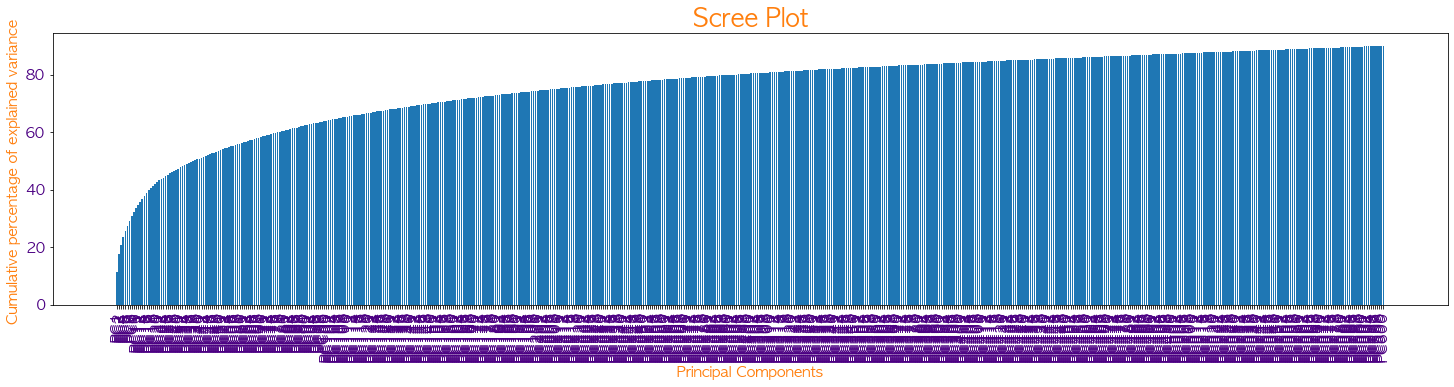

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC591,PC592,PC593,PC594,PC595,PC596,PC597,PC598,PC599,PC600
0,-0.009858,0.477805,0.806920,-0.460605,-0.008932,-0.376285,-0.368366,-0.551784,-0.350214,-0.196455,...,0.026411,0.005203,-0.007162,0.020368,-0.024257,-0.037374,0.000111,0.000452,-0.001660,0.001264
1,1.892558,-0.442629,0.209595,0.463680,0.931256,-0.003160,0.104123,0.426147,-0.541082,-0.793139,...,-0.027845,0.037963,0.021958,-0.033990,0.014638,-0.038212,-0.000540,-0.016687,0.006691,0.015321
2,-0.870839,1.339358,-0.716104,0.796148,-0.230227,-0.350980,-0.001632,0.033271,-0.067134,-0.031889,...,0.016531,-0.021727,0.012617,-0.001054,-0.016560,0.002001,0.001987,0.011630,0.006948,0.001835
3,1.797593,0.152652,-0.366415,0.224401,-0.181880,0.176665,-0.025971,-0.028135,0.098604,-0.169076,...,0.031803,0.045233,0.013933,-0.011830,0.022162,-0.007963,-0.007977,0.016892,0.017083,-0.005302
4,-0.769998,1.346103,-0.794740,0.421177,-0.047480,-0.119300,-0.034892,0.105987,-0.114239,0.067393,...,-0.007192,-0.010914,-0.002918,-0.005521,-0.005322,0.012807,0.014331,-0.023190,0.023133,0.009645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31679,1.539609,-0.145747,0.254914,-0.075059,-0.040440,0.096006,0.101783,-0.320448,0.096545,-0.817094,...,0.004822,-0.005462,0.046200,0.016076,-0.027957,0.012462,0.001775,-0.015110,0.032851,0.034257
31680,1.733757,0.205105,-0.526886,0.091672,-0.259832,0.070444,0.514069,-0.541155,0.249785,0.323154,...,0.071341,0.073208,0.048627,0.084643,0.075340,0.005024,-0.043938,-0.137289,0.084853,0.040782
31681,1.653511,0.212362,-0.523760,0.025188,-0.220642,0.179585,0.003923,-0.455266,0.590354,-0.870691,...,0.023452,-0.006976,-0.032508,0.025069,0.013470,-0.013600,-0.009110,-0.002383,-0.015368,0.000242
31682,1.847377,0.145054,-0.432200,0.113646,-0.122051,0.220145,0.047331,-0.063591,0.259991,-0.823434,...,-0.016196,-0.009939,-0.010972,0.040088,0.004693,0.004791,-0.004334,0.022164,-0.000340,-0.051259


(31684, 600)


In [23]:
# PCA 적용
if feature_reducing == "correlation":
    threshold = 0.7
    correlated_features = remove_collinearity(trainX, threshold)
    correlated_features = set(correlated_features) # 중복 제거
    print("%d Correlation features over %.2f" % (len(correlated_features), threshold))
    
    X = trainX.drop(columns=correlated_features)
    print(X.shape)
    
elif feature_reducing == "feature_importance":
    show_plot = True
    model = RandomForestRegressor(max_features="sqrt", n_jobs=-1, random_state=0xC0FFEE)
    model.fit(trainX, y)
    important_features = find_feature_importance(trainX, model, show_plot)
    X = trainX[important_features]
    print(X.shape)
    
elif feature_reducing == "PCA":
    show_plot = True
    pca_model, X = apply_PCA(trainX, show_plot)
    print(X.shape)

In [24]:
# 첫번째 테스트용으로 사용하고, 실제 학습시에는 K-Fold CV를 사용합니다.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0xC0FFEE)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(28515, 600) (3169, 600) (28515,) (3169,)


In [31]:
def RMSE(y, y_pred):
    rmse = mean_squared_error(y, y_pred) ** 0.5
    return rmse

def rmse_cv(model):
    # cv별로 학습하는 함수
    tscv = TimeSeriesSplit(n_splits=10)
    rmse_list = []
    model_name = model.__class__.__name__
    for _, (train_index, test_index) in tqdm(enumerate(tscv.split(X_train), start=1), desc=f'{model_name} Cross Validations...', total=10):
        train_X, test_X = X_train.iloc[train_index], X_train.iloc[test_index]
        train_y, test_y = y_train.iloc[train_index], y_train.iloc[test_index]
        clf = model.fit(train_X, train_y)
        pred = clf.predict(test_X)
        rmse = RMSE(test_y, pred) 
        rmse_list.append(rmse)
    return model_name, rmse_list

def print_rmse_score(model):
    # cv별 프린팅, 평균 저장
    model_name, score = rmse_cv(model)
    for i, r in enumerate(score, start=1):
        print(f'{i} FOLDS: {model_name} RMSLE: {r:.4f}')
    print(f'\n{model_name} mean RMSLE: {np.mean(score):.4f}')
    print('='*40)
    return model_name, np.mean(score)

In [32]:
reg = LinearRegression(n_jobs=-1)
ridge = Ridge(alpha=0.8, random_state=1)
lasso = Lasso(alpha = 0.01, random_state=1)
DTree = DecisionTreeRegressor(max_depth=6, min_samples_split=10, min_samples_leaf=15, random_state=1)
rf = RandomForestRegressor(n_estimators=500, criterion='mse', max_depth=9, min_samples_split=50,
                           min_samples_leaf=5, random_state=1, n_jobs=-1)
model_xgb = xgb.XGBRegressor(n_estimators=500, max_depth=9, min_child_weight=5, gamma=0.1, n_jobs=-1)
model_lgb = lgb.LGBMRegressor(n_estimators=500, max_depth=9, min_child_weight=5, n_jobs=-1)

In [33]:
models = []
scores = []
for model in [reg, ridge, lasso, DTree, rf, model_xgb, model_lgb]:              # [reg, ridge, lasso, DTree, rf, model_xgb, model_lgb] 
    model_name, mean_score = print_rmse_score(model)                            # rf는 오래걸림
    models.append(model_name)
    scores.append(mean_score)

LinearRegression Cross Validations...: 100%|██████████| 10/10 [00:13<00:00,  1.36s/it]


1 FOLDS: LinearRegression RMSLE: 6.8051
2 FOLDS: LinearRegression RMSLE: 6.6276
3 FOLDS: LinearRegression RMSLE: 6.5752
4 FOLDS: LinearRegression RMSLE: 6.5134
5 FOLDS: LinearRegression RMSLE: 6.6196
6 FOLDS: LinearRegression RMSLE: 9.2473
7 FOLDS: LinearRegression RMSLE: 6.0992
8 FOLDS: LinearRegression RMSLE: 5.5945
9 FOLDS: LinearRegression RMSLE: 7.7323
10 FOLDS: LinearRegression RMSLE: 5.7175

LinearRegression mean RMSLE: 6.7532


Ridge Cross Validations...: 100%|██████████| 10/10 [00:01<00:00,  6.23it/s]


1 FOLDS: Ridge RMSLE: 6.4756
2 FOLDS: Ridge RMSLE: 6.5963
3 FOLDS: Ridge RMSLE: 6.5567
4 FOLDS: Ridge RMSLE: 6.5069
5 FOLDS: Ridge RMSLE: 6.6142
6 FOLDS: Ridge RMSLE: 9.2469
7 FOLDS: Ridge RMSLE: 6.0946
8 FOLDS: Ridge RMSLE: 5.5907
9 FOLDS: Ridge RMSLE: 7.7322
10 FOLDS: Ridge RMSLE: 5.7149

Ridge mean RMSLE: 6.7129


Lasso Cross Validations...: 100%|██████████| 10/10 [00:03<00:00,  3.30it/s]


1 FOLDS: Lasso RMSLE: 5.2687
2 FOLDS: Lasso RMSLE: 6.4866
3 FOLDS: Lasso RMSLE: 6.3216
4 FOLDS: Lasso RMSLE: 6.5048
5 FOLDS: Lasso RMSLE: 6.5522
6 FOLDS: Lasso RMSLE: 9.3942
7 FOLDS: Lasso RMSLE: 5.9689
8 FOLDS: Lasso RMSLE: 5.4856
9 FOLDS: Lasso RMSLE: 7.9323
10 FOLDS: Lasso RMSLE: 5.5842

Lasso mean RMSLE: 6.5499


ElasticNet Cross Validations...: 100%|██████████| 10/10 [00:05<00:00,  1.81it/s]


1 FOLDS: ElasticNet RMSLE: 4.9348
2 FOLDS: ElasticNet RMSLE: 6.4634
3 FOLDS: ElasticNet RMSLE: 6.3155
4 FOLDS: ElasticNet RMSLE: 6.4894
5 FOLDS: ElasticNet RMSLE: 6.5453
6 FOLDS: ElasticNet RMSLE: 9.3826
7 FOLDS: ElasticNet RMSLE: 5.9540
8 FOLDS: ElasticNet RMSLE: 5.4718
9 FOLDS: ElasticNet RMSLE: 7.9209
10 FOLDS: ElasticNet RMSLE: 5.5614

ElasticNet mean RMSLE: 6.5039


DecisionTreeRegressor Cross Validations...: 100%|██████████| 10/10 [00:35<00:00,  3.58s/it]


1 FOLDS: DecisionTreeRegressor RMSLE: 5.4460
2 FOLDS: DecisionTreeRegressor RMSLE: 6.5777
3 FOLDS: DecisionTreeRegressor RMSLE: 6.6119
4 FOLDS: DecisionTreeRegressor RMSLE: 6.5030
5 FOLDS: DecisionTreeRegressor RMSLE: 6.7859
6 FOLDS: DecisionTreeRegressor RMSLE: 9.0941
7 FOLDS: DecisionTreeRegressor RMSLE: 6.0529
8 FOLDS: DecisionTreeRegressor RMSLE: 5.5626
9 FOLDS: DecisionTreeRegressor RMSLE: 7.6169
10 FOLDS: DecisionTreeRegressor RMSLE: 5.6647

DecisionTreeRegressor mean RMSLE: 6.5916


RandomForestRegressor Cross Validations...: 100%|██████████| 10/10 [48:04<00:00, 288.47s/it]


1 FOLDS: RandomForestRegressor RMSLE: 5.2796
2 FOLDS: RandomForestRegressor RMSLE: 6.5727
3 FOLDS: RandomForestRegressor RMSLE: 6.5487
4 FOLDS: RandomForestRegressor RMSLE: 6.4073
5 FOLDS: RandomForestRegressor RMSLE: 6.6195
6 FOLDS: RandomForestRegressor RMSLE: 9.0452
7 FOLDS: RandomForestRegressor RMSLE: 6.0225
8 FOLDS: RandomForestRegressor RMSLE: 5.5339
9 FOLDS: RandomForestRegressor RMSLE: 7.7029
10 FOLDS: RandomForestRegressor RMSLE: 5.7471

RandomForestRegressor mean RMSLE: 6.5479


XGBRegressor Cross Validations...: 100%|██████████| 10/10 [25:17<00:00, 151.76s/it]


1 FOLDS: XGBRegressor RMSLE: 5.8117
2 FOLDS: XGBRegressor RMSLE: 6.7894
3 FOLDS: XGBRegressor RMSLE: 7.1115
4 FOLDS: XGBRegressor RMSLE: 6.1331
5 FOLDS: XGBRegressor RMSLE: 6.5581
6 FOLDS: XGBRegressor RMSLE: 7.5940
7 FOLDS: XGBRegressor RMSLE: 6.3583
8 FOLDS: XGBRegressor RMSLE: 9.0251
9 FOLDS: XGBRegressor RMSLE: 6.8799
10 FOLDS: XGBRegressor RMSLE: 5.8917

XGBRegressor mean RMSLE: 6.8153


LGBMRegressor Cross Validations...: 100%|██████████| 10/10 [01:11<00:00,  7.13s/it]

1 FOLDS: LGBMRegressor RMSLE: 5.3851
2 FOLDS: LGBMRegressor RMSLE: 6.6249
3 FOLDS: LGBMRegressor RMSLE: 6.4599
4 FOLDS: LGBMRegressor RMSLE: 5.8464
5 FOLDS: LGBMRegressor RMSLE: 6.1146
6 FOLDS: LGBMRegressor RMSLE: 8.6528
7 FOLDS: LGBMRegressor RMSLE: 6.1669
8 FOLDS: LGBMRegressor RMSLE: 6.8662
9 FOLDS: LGBMRegressor RMSLE: 6.8724
10 FOLDS: LGBMRegressor RMSLE: 5.7270

LGBMRegressor mean RMSLE: 6.4716


In [34]:
result_df = pd.DataFrame({'Model': models, 'Score': scores}).reset_index(drop=True)
result_df

,Model,Score
0,LinearRegression,6.753172
1,Ridge,6.712889
2,Lasso,6.549914
3,ElasticNet,6.503905
4,DecisionTreeRegressor,6.591571
5,RandomForestRegressor,6.547938
6,XGBRegressor,6.815291
7,LGBMRegressor,6.471627


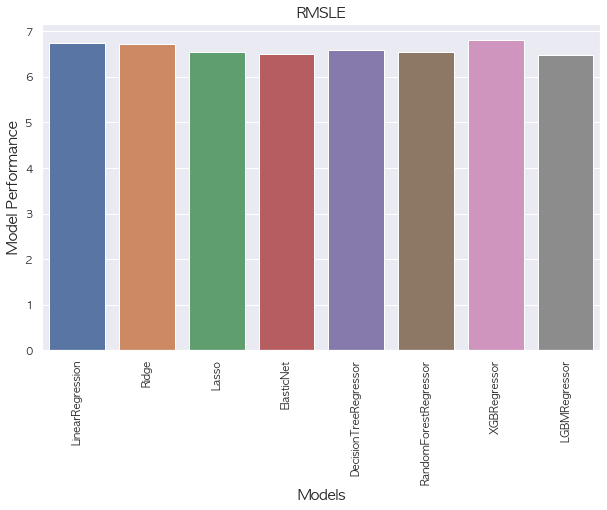

In [41]:
f, ax = plt.subplots(figsize=(10, 6))
plt.xticks(rotation='90')
sns.barplot(x=result_df['Model'], y=result_df['Score'])
plt.xlabel('Models', fontsize=15)
plt.ylabel('Model Performance', fontsize=15)
plt.title('RMSLE', fontsize=15)
plt.show()

# hyperparameter tuning

In [36]:
X = train.drop(['운송장_건수'],axis=1)
y = train['운송장_건수']

In [37]:
# 첫번째 테스트용으로 사용하고, 실제 학습시에는 K-Fold CV를 사용합니다.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0xC0FFEE)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


# h_train_X > X_train
# h_train_y > y_train
# h_valid_X > X_test
# h_valid_y > y_test


(28515, 11) (3169, 11) (28515,) (3169,)


In [38]:
from optuna.samplers import TPESampler

sampler = TPESampler(seed=10)

def objective(trial):
    dtrain = lgb.Dataset(X_train, label=y_train)
    dtest = lgb.Dataset(X_test, label=y_test)

    param = {
        'objective': 'regression', # 회귀
        'verbose': -1,
        'metric': 'rmse', 
        'max_depth': trial.suggest_int('max_depth',3, 15),
        'learning_rate': trial.suggest_loguniform("learning_rate", 1e-8, 1e-2),
        'n_estimators': trial.suggest_int('n_estimators', 100, 3000),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_loguniform('subsample', 0.4, 1),
    }

    model = lgb.LGBMRegressor(**param)
    lgb_model = model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=25)
    rmse = RMSE(y_test, lgb_model.predict(X_test))
    return rmse
        
study_lgb = optuna.create_study(direction='minimize', sampler=sampler)
study_lgb.optimize(objective, n_trials=100)

[I 2022-06-14 15:51:30,539] A new study created in memory with name: no-name-8d12ebfc-668d-466a-84c1-534b105dd2f7
[I 2022-06-14 15:51:36,681] Trial 0 finished with value: 6.265843526191528 and parameters: {'max_depth': 13, 'learning_rate': 1.3320229150659043e-08, 'n_estimators': 1938, 'min_child_samples': 76, 'subsample': 0.6315909175774905}. Best is trial 0 with value: 6.265843526191528.
[I 2022-06-14 15:51:39,866] Trial 1 finished with value: 6.2657822823886296 and parameters: {'max_depth': 5, 'learning_rate': 1.5430400149097381e-07, 'n_estimators': 2306, 'min_child_samples': 21, 'subsample': 0.4337244827306443}. Best is trial 1 with value: 6.2657822823886296.
[I 2022-06-14 15:51:40,261] Trial 2 finished with value: 6.197425447205794 and parameters: {'max_depth': 11, 'learning_rate': 0.005252427629146827, 'n_estimators': 111, 'min_child_samples': 54, 'subsample': 0.8422371309477078}. Best is trial 2 with value: 6.197425447205794.
[I 2022-06-14 15:51:43,044] Trial 3 finished with valu

In [39]:
trial = study_lgb.best_trial
trial_params = trial.params
print('Best Trial: score {},\nparams {}'.format(trial.value, trial_params))

Best Trial: score 6.185749298802752,
params {'max_depth': 4, 'learning_rate': 0.00240156052901795, 'n_estimators': 620, 'min_child_samples': 55, 'subsample': 0.45158760240306817}


In [42]:
final_lgb_model = lgb.LGBMRegressor(**trial_params)
final_lgb_model.fit(X_train, y_train)
final_lgb_pred = final_lgb_model.predict(test)

In [43]:
final_lgb_pred

array([5.64969468, 5.17528458, 4.54773271, ..., 4.07279109, 4.30690912,
       5.00050919])

<BarContainer object of 11 artists>

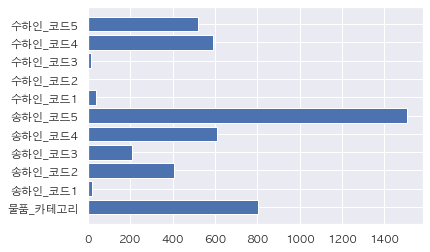

In [44]:
plt.barh(X_train.columns, final_lgb_model.feature_importances_)

In [45]:
final_pred_sub = np.expm1(final_lgb_pred)
final_pred_sub

array([283.20467845, 175.84693422,  93.41809224, ...,  57.7206288 ,
        73.2107577 , 147.48874952])

In [47]:
sub = pd.read_csv('data/test.csv')
sub_df = pd.DataFrame({'index': sub['index'], '운송장_건수': final_pred_sub})
sub_df

,index,운송장_건수
0,0,283.204678
1,1,175.846934
2,2,93.418092
3,3,98.442273
4,4,132.500786
...,...,...
7915,7915,133.499909
7916,7916,152.514612
7917,7917,57.720629
7918,7918,73.210758


In [48]:
sub_df.to_csv('submission_lgb_clean.csv', index=False)

In [50]:
sub_df.loc[sub_df.운송장_건수>10000000,'운송장_건수']

1481    1.184356e+07
1762    5.652072e+10
3757    1.584570e+07
4360    4.315330e+07
4937    1.079350e+07
6106    2.019220e+07
Name: 운송장_건수, dtype: float64

# 예측 망함